<a href="https://colab.research.google.com/github/Kavya2099/British-Airways-virtual-internship/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I have come to boarding and...
1,✅ Trip Verified | Stinking nappies being chang...
2,✅ Trip Verified | Worst service ever. Lost bag...
3,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
4,✅ Trip Verified | Not a great experience. I co...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | I have come to boarding and...
1,✅ Trip Verified | Stinking nappies being chang...
2,✅ Trip Verified | Worst service ever. Lost bag...
3,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
4,✅ Trip Verified | Not a great experience. I co...
...,...
995,✅ Trip Verified | London City to Florence. My...
996,✅ Trip Verified | London to Johannesburg. Sin...
997,✅ Trip Verified | Doha to London Heathrow. Fl...
998,✅ Trip Verified | Miami to Tel Aviv via Londo...


Removing the parts before | in the reviews column

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [7]:
df.to_csv("Br.csv")

In [6]:
df

,reviews
0,As always when I fly BA it was a total shamb...
1,First time using BA business class but we we...
2,Extremely rude ground service. We were non-r...
3,My son and I flew to Geneva last Sunday for ...
4,For the price paid (bought during a sale) it...
...,...
995,Bridgetown to Gatwick. I couldn't imagine th...
996,London to Athens. Classic BA love and hate r...
997,I booked a British Airways flight from Amste...
998,Flying premium economy on British Airways fr...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [ ]:
#Strip the link of news
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

df['Clean_Headline'] = df['Clean_Headline'].apply(strip_html_tags)
df['clean_linkcontent'] = df['clean_linkcontent'].apply(remove_newlines_tabs)

# strip link-- remove link
def remove_links(text):
    remove_https = re.sub(r'http\S+', '', text)
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

df['Clean_Headline'] = df['Clean_Headline'].apply(remove_links)
df['clean_linkcontent'] = df['clean_linkcontent'].apply(remove_links)

# Remove WhiteSpaces

def remove_whitespace(text):
     pattern = re.compile(r'\s+') 
     Without_whitespace = re.sub(pattern, ' ', text)
     text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
     return text    
 
df['Clean_Headline'] = df['Clean_Headline'].apply(remove_whitespace)
df['clean_linkcontent'] = df['clean_linkcontent'].apply(remove_whitespace)
#------------------
# Step1: Remove Accented Characters & number
import unidecode
def accented_characters_removal(text):
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = unidecode.unidecode(text)
    return text

df['Processed_content_link'] = df['clean_linkcontent'].apply(accented_characters_removal)
len(df['Processed_content_link'])
#Step2: Case Conversion

def lower_casing_text(text):
    text = text.lower()
    return text

df['Processed_content_link'] = df['Processed_content_link'].apply(lower_casing_text)
#Step3: Reduce repeated characters and punctuations
def reducing_incorrect_character_repeatation(text):
     # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted


df['Processed_content_link'] = df['Processed_content_link'].apply(reducing_incorrect_character_repeatation)
# Step4: Expand contraction words
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}


def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):
    list_Of_tokens = text.split(' ')
    String_Of_tokens = text  # initialize the variable with original text
    for Word in list_Of_tokens: 
        if Word in CONTRACTION_MAP: 
            list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
            String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    return String_Of_tokens

df['Processed_content_link'] = df['Processed_content_link'].apply(expand_contractions)
#Step5: Remove special characters
def removing_special_characters(text): 
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text)
    return Formatted_Text

df['Processed_content_link'] = df['Processed_content_link'].apply(removing_special_characters)
# Step6: Remove stopwords
def removing_stopwords(text):
    text = repr(text)
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    words_string = ' '.join(No_StopWords)    
    return words_string
df['Processed_content_link'] = df['Processed_content_link'].apply(removing_stopwords)
# Step7: Correct mis-spelled words in text
def spelling_correction(text):
    spell = Speller(lang='en')
    Corrected_text = spell(text)
    return Corrected_text

df['Processed_content_link'] = df['Processed_content_link'].apply(spelling_correction)
len(df['Processed_content_link'] )
#Step8: Lemmatization
def lemmatization(text):
    lemma = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
    return lemma

df['Processed_content_link'] = df['Processed_content_link'].apply(lemmatization)
df.to_csv('Cleaned_Data_Spell.csv', index = False)
#Step9: Putting all in single function

def text_preprocessing(text, accented_chars=True, contractions=True, lemma = True,
                        extra_whitespace=True, newlines_tabs=True, repeatition=True, 
                       lowercase=True, punctuations=True, mis_spell=True,
                       remove_html=True, links=True,  special_chars=True,
                       stop_words=False):
    if newlines_tabs == True: #remove newlines & tabs.
        Data = remove_newlines_tabs(text)

    if remove_html == True: #remove html tags
        Data = strip_html_tags(Data)

    if links == True: #remove links
        Data = remove_links(Data)

    if extra_whitespace == True: #remove extra whitespaces
        Data = remove_whitespace(Data)

    if accented_chars == True: #remove accented characters
        Data = accented_characters_removal(Data)

    if lowercase == True: #convert all characters to lowercase
        Data = lower_casing_text(Data)

    if repeatition == True: #Reduce repeatitions   
        Data = reducing_incorrect_character_repeatation(Data)

    if contractions == True: #expand contractions
        Data = expand_contractions(Data)

    if punctuations == True: #remove punctuations
        Data = removing_special_characters(Data)

    stoplist = stopwords.words('english') 
    stoplist = set(stoplist)
    
    if stop_words == True: #Remove stopwords
        Data = removing_stopwords(Data)

    spell = Speller(lang='en')
    
    if mis_spell == True: #Check for mis-spelled words & correct them.
        Data = spelling_correction(Data)

    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
     
    if lemma == True: #Converts words to lemma form.
        Data = lemmatization(Data)

    if isinstance(Data, list): # ensure Data is a single string
        Data = ' '.join(Data)
        
    return Data

def list_content(Data):
    if isinstance(Data, list):  # ensure Data is a list
        Data = ' '.join(str(i) for i in Data)  # convert all elements to string before joining
    return Data

df['Processed_content_link'] = df['Processed_content_link'].apply(list_content)

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...
1,First time using BA business class but we we...,First time using BA business class but we wer...
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...


# Step 1: Cleaning the text

# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /Users/xuhanling/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuhanling/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xuhanling/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/xuhanling/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xuhanling/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)..."
1,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (..."
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv..."
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ..."
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,As always when I fly BA it was a total shamb...,As always when I fly BA it was a total shambl...,"[(always, r), (fly, v), (BA, None), (total, a)...",always fly BA total shamble book Manchester ...
1,First time using BA business class but we we...,First time using BA business class but we wer...,"[(First, a), (time, n), (using, v), (BA, n), (...",First time use BA business class pleased ser...
2,Extremely rude ground service. We were non-r...,Extremely rude ground service We were non rev...,"[(Extremely, r), (rude, a), (ground, n), (serv...",Extremely rude ground service non rev fly Lo...
3,My son and I flew to Geneva last Sunday for ...,My son and I flew to Geneva last Sunday for a...,"[(son, n), (flew, v), (Geneva, n), (last, a), ...",son fly Geneva last Sunday skiing holiday Le...
4,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,As always when I fly BA it was a total shamb...,always fly BA total shamble book Manchester ...
1,First time using BA business class but we we...,First time use BA business class pleased ser...
2,Extremely rude ground service. We were non-r...,Extremely rude ground service non rev fly Lo...
3,My son and I flew to Geneva last Sunday for ...,son fly Geneva last Sunday skiing holiday Le...
4,For the price paid (bought during a sale) it...,price pay bought sale decent experience alth...
...,...,...
995,Bridgetown to Gatwick. I couldn't imagine th...,Bridgetown Gatwick imagine first class BA wo...
996,London to Athens. Classic BA love and hate r...,London Athens Classic BA love hate relations...
997,I booked a British Airways flight from Amste...,book British Airways flight Amsterdam London...
998,Flying premium economy on British Airways fr...,Flying premium economy British Airways New O...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [51]:
!pip install vaderSentiment

In [31]:
from textblob import TextBlob


def get_sentiment_polar(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['Sentiment_text'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis_text'] = df['Sentiment_text'].apply(vader_analysis)

def get_sentiment_sub(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

def blob_sub_analysis(compound):
    if compound >= 0.5:
        return 'Subjective'
    else:
        return 'objective'

df['Sentiment_sub'] = df['Lemma'].apply(get_sentiment_sub)
df['Analysis_sub'] = df['Sentiment_sub'].apply(blob_sub_analysis)

In [43]:
blob_counts_text = df['Analysis_text'].value_counts()
blob_counts_sub = df['Analysis_sub'].value_counts()
blob_counts_text

objective     537
Subjective    463
Name: Analysis_sub, dtype: int64

# Visual Representation

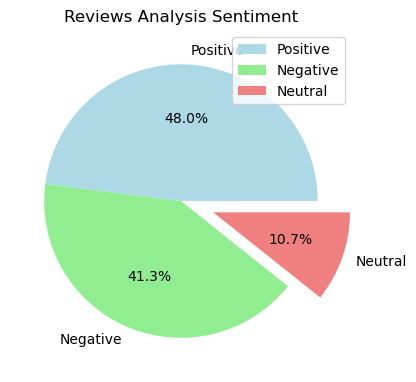

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_sentiment_analysis(blob_counts_text):
    # Create a figure with subplots
    plt.figure(figsize=(15, 7))

    # Subplot for the pie chart
    plt.subplot(1, 3, 2)
    plt.title("Reviews Analysis Sentiment")

    # Customize the pie chart
    explode = (0, 0, 0.25)
    labels = blob_counts_text.index
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    autopct='%1.1f%%'

    # Plot the pie chart
    plt.pie(blob_counts_text.values, labels=labels, explode=explode, autopct=autopct, shadow=False, colors=colors)

    # Add a legend
    plt.legend(labels, loc="best")

    # Show the plot
    plt.show()
    
plot_sentiment_analysis(blob_counts_text)

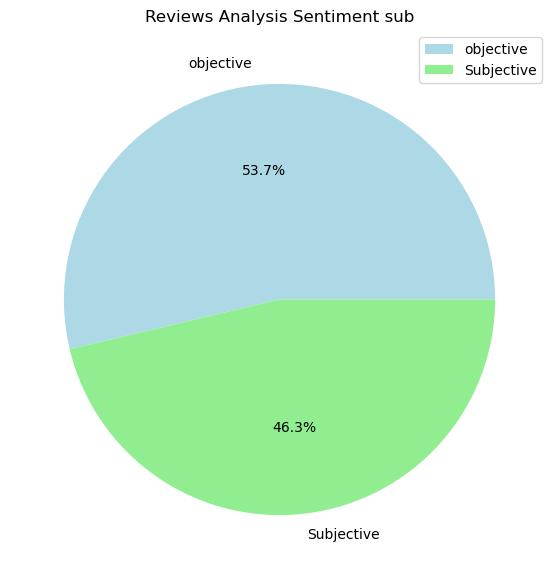

In [42]:
def plot_sentiment_analysis_sub(blob_counts_text):
    # Create a figure with subplots
    plt.figure(figsize=(15, 7))

    # Subplot for the pie chart
    plt.title("Reviews Analysis Sentiment sub")

    # Customize the pie chart
    explode = (0, 0)
    labels = blob_counts_text.index
    colors = ['lightblue', 'lightgreen']
    autopct='%1.1f%%'

    # Plot the pie chart
    plt.pie(blob_counts_text.values, labels=labels, explode=explode, autopct=autopct, shadow=False, colors=colors)

    # Add a legend
    plt.legend(labels, loc="best")

    # Show the plot
    plt.show()

plot_sentiment_analysis_sub(blob_counts_sub)

In [17]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

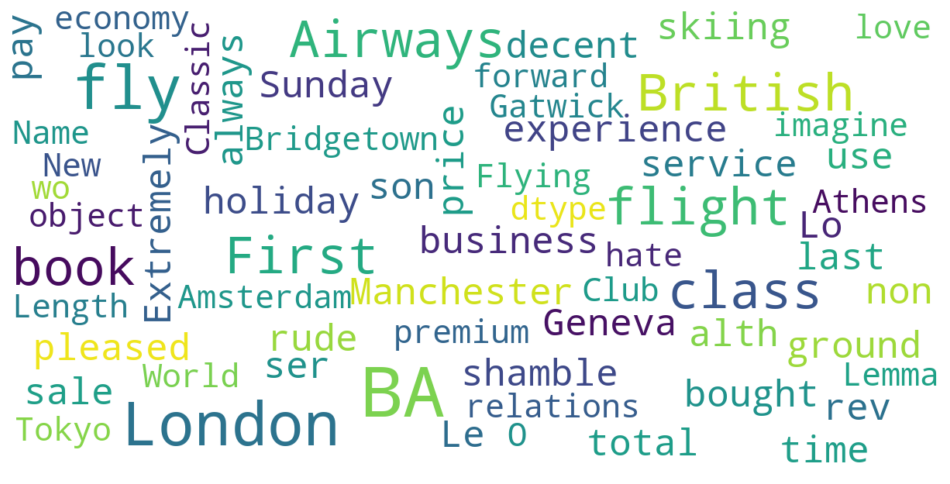

In [49]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def generate_wordcloud(data, stopwords=None, max_words=100, max_font_size=30, scale=3, background_color='white'):
    # Set default stopwords if not provided
    if stopwords is None:
        stopwords = set(STOPWORDS)

    # Create a WordCloud object
    wordcloud = WordCloud(
        background_color=background_color,
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        scale=scale,
        random_state=1
    )

    # Generate the word cloud from the data
    wordcloud = wordcloud.generate(str(data))

    # Display the word cloud
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# Example usage with your DataFrame
# Replace 'df.Lemma' with your actual data
# You can also customize stopwords, max_words, max_font_size, scale, and background_color
generate_wordcloud(df.Lemma)

NameError: name 'wordcloud' is not defined